In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset1
pcs = pd.read_csv("PCS_data.csv")

pcs.head()


,States/UTs,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
0,Andaman & Nicobar Islands,3,5,5
1,Andhra Pradesh,307,348,355
2,Arunachal Pradesh,9,16,16
3,Assam,52,91,91
4,Bihar,106,183,183


In [3]:
#dataset2
ev = pd.read_csv("EV_India.csv")

ev.head()

,States/UTs,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,Andaman & Nicobar Islands,162,"1,46,945","1,47,107"
1,Andhra Pradesh,29565,"1,47,27,558","1,47,57,123"
2,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,Assam,64766,"46,77,053","47,41,819"
4,Bihar,83335,"1,04,07,078","1,04,90,413"


In [4]:
PCS_EV_data = pd.merge(ev, pcs, on='States/UTs', how='outer')

PCS_EV_data.to_csv('merged(EV&PCS)_dataset.csv', index=False)

#combined data is for geagraphical analysis
ge_data = PCS_EV_data.copy()

ge_data

,States/UTs,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
0,Andaman & Nicobar Islands,162,"1,46,945","1,47,107",3,5,5
1,Andhra Pradesh,29565,"1,47,27,558","1,47,57,123",307,348,355
2,Arunachal Pradesh,20,"2,52,965","2,52,985",9,16,16
3,Assam,64766,"46,77,053","47,41,819",52,91,91
4,Bihar,83335,"1,04,07,078","1,04,90,413",106,183,183
5,Chandigarh,2812,"7,46,881","7,49,693",9,11,17
6,Chhattisgarh,20966,"68,36,200","68,57,166",110,152,156
7,Delhi,"1,56,393","76,85,600","78,41,993",1627,2917,3247
8,Goa,3870,"10,71,570","10,75,440",55,75,90
9,Gujarat,45272,"2,06,05,484","2,06,50,756",303,490,601


In [5]:
pe_data = pd.read_csv("ev_models.csv")

pe_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
#loading the behavior/demographic dataset
de_data = pd.read_csv("Indian automoble buying behavour study.csv")

de_data.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


In [7]:
ge_data.describe()


,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
count,32.000000,32.000000,32.000000
mean,284.750000,484.218750,539.031250
std,511.327116,832.797142,931.563842
min,2.000000,4.000000,4.000000
25%,18.750000,48.000000,48.000000
50%,112.000000,175.000000,187.500000
75%,304.000000,505.000000,607.000000
max,2494.000000,3793.000000,4211.000000


In [8]:
de_data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [9]:
# Check for missing values
print(ge_data.isnull().sum())

print(de_data.isnull().sum())


States/UTs                                          0
Total Electric Vehicle                              0
Total Non-Electric Vehicle                          0
Total                                               0
No. of Operational Public Charging Station (PCS)    0
Number of EV Chargers                               0
Number of Charging Points/Vehicle Connectors        0
dtype: int64
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64


Geographic distributions

In [10]:
ge_sorted = ge_data.sort_values(by='Total Electric Vehicle', ascending=False)

Text(0.5, 1.0, 'Number of Electric Vehicles by State')

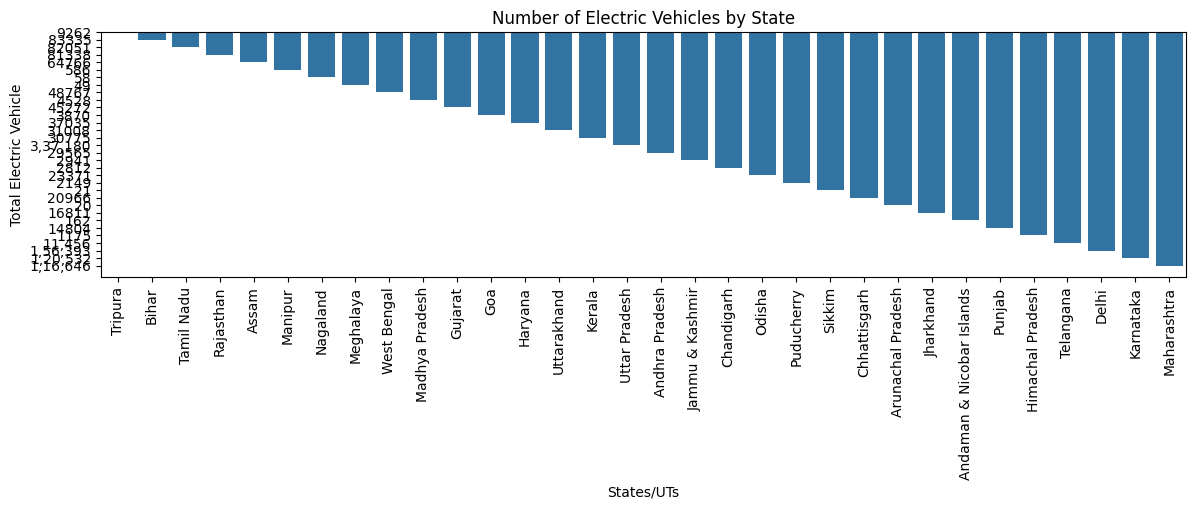

In [11]:
plt.figure(figsize=(14, 7))

# Number of EVs by State
plt.subplot(2, 1, 1)
sns.barplot(x='States/UTs', y='Total Electric Vehicle', data= ge_sorted)
plt.xticks(rotation=90)
plt.title('Number of Electric Vehicles by State')


#maharashtra and Karnataka  have most no. of EVs with Delhi being a cose third.

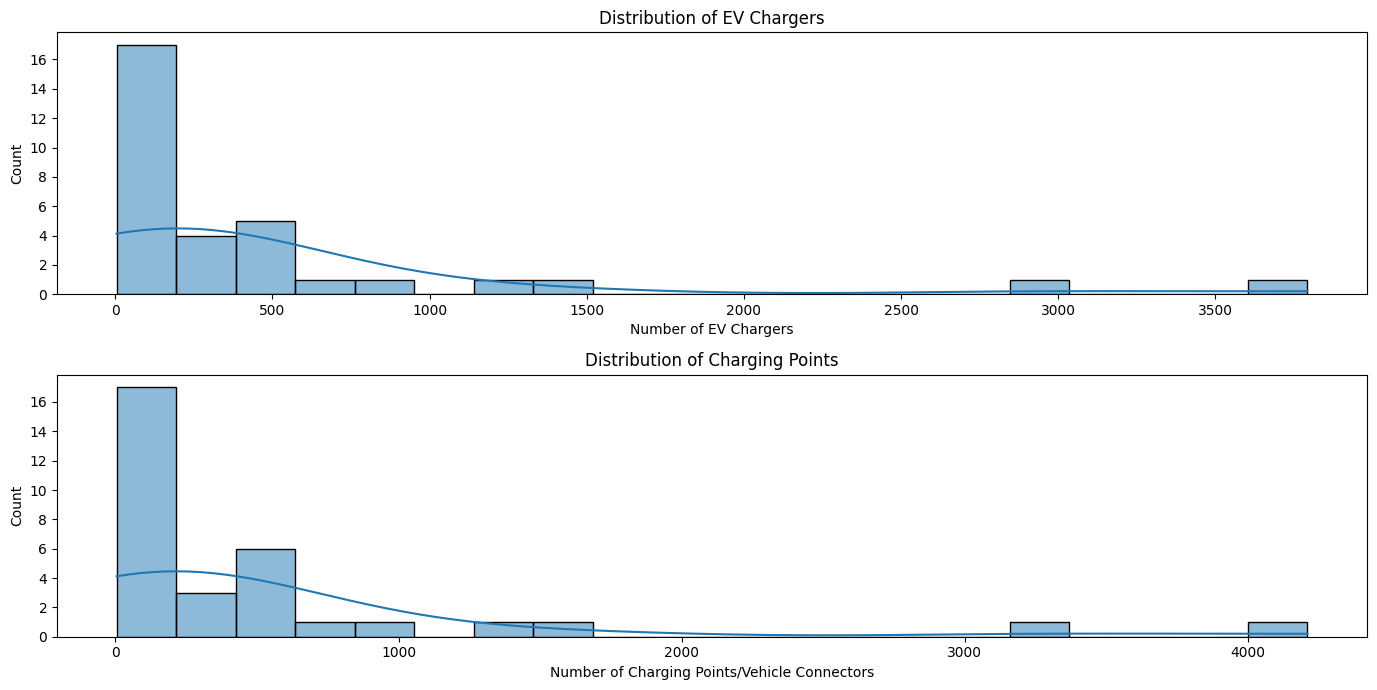

In [12]:
plt.figure(figsize=(14, 7))

# Distribution of EV Chargers
plt.subplot(2, 1, 1)
sns.histplot(ge_data['Number of EV Chargers'], bins=20, kde=True)
plt.title('Distribution of EV Chargers')

# Distribution of Charging Points
plt.subplot(2, 1, 2)
sns.histplot(ge_data['Number of Charging Points/Vehicle Connectors'], bins=20, kde=True)
plt.title('Distribution of Charging Points')

plt.tight_layout()
plt.show()

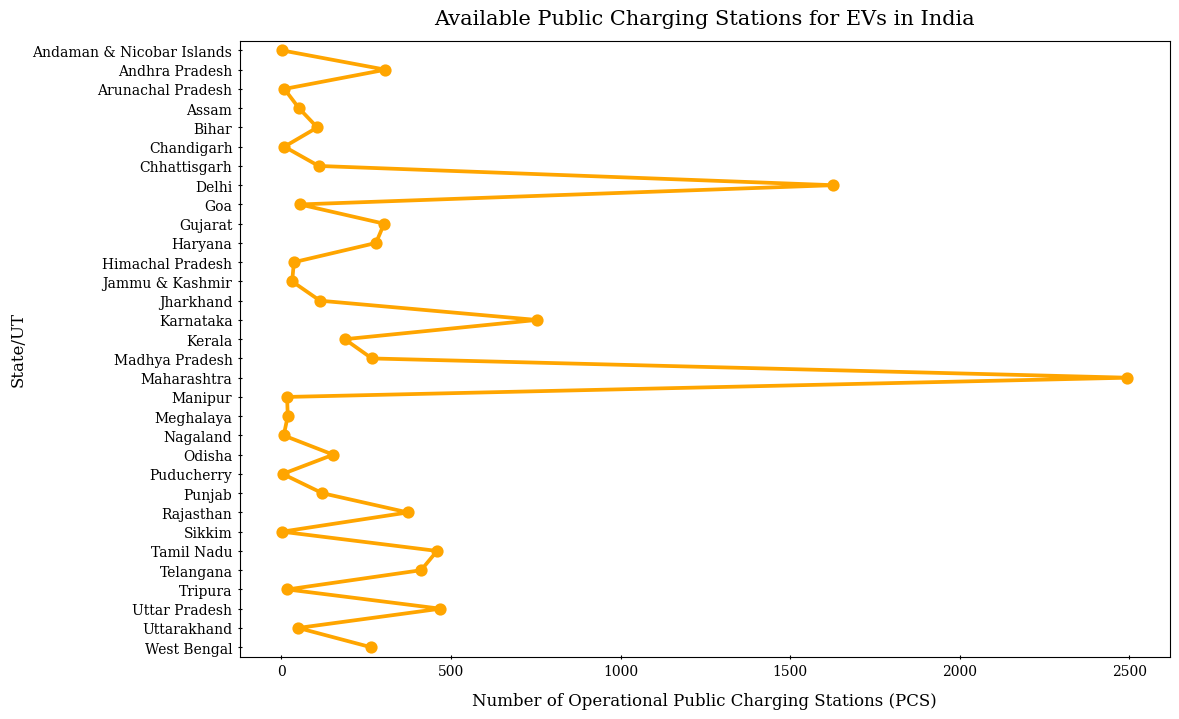

In [13]:
# Assuming the merged dataset is named merged_df
plt.figure(figsize=(12, 8))
sns.pointplot(data=ge_data, y='States/UTs', x='No. of Operational Public Charging Station (PCS)', color='orange')
plt.xlabel('Number of Operational Public Charging Stations (PCS)', family='serif', size=12, labelpad=10)
plt.ylabel('State/UT', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Public Charging Stations for EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Demographic distributions

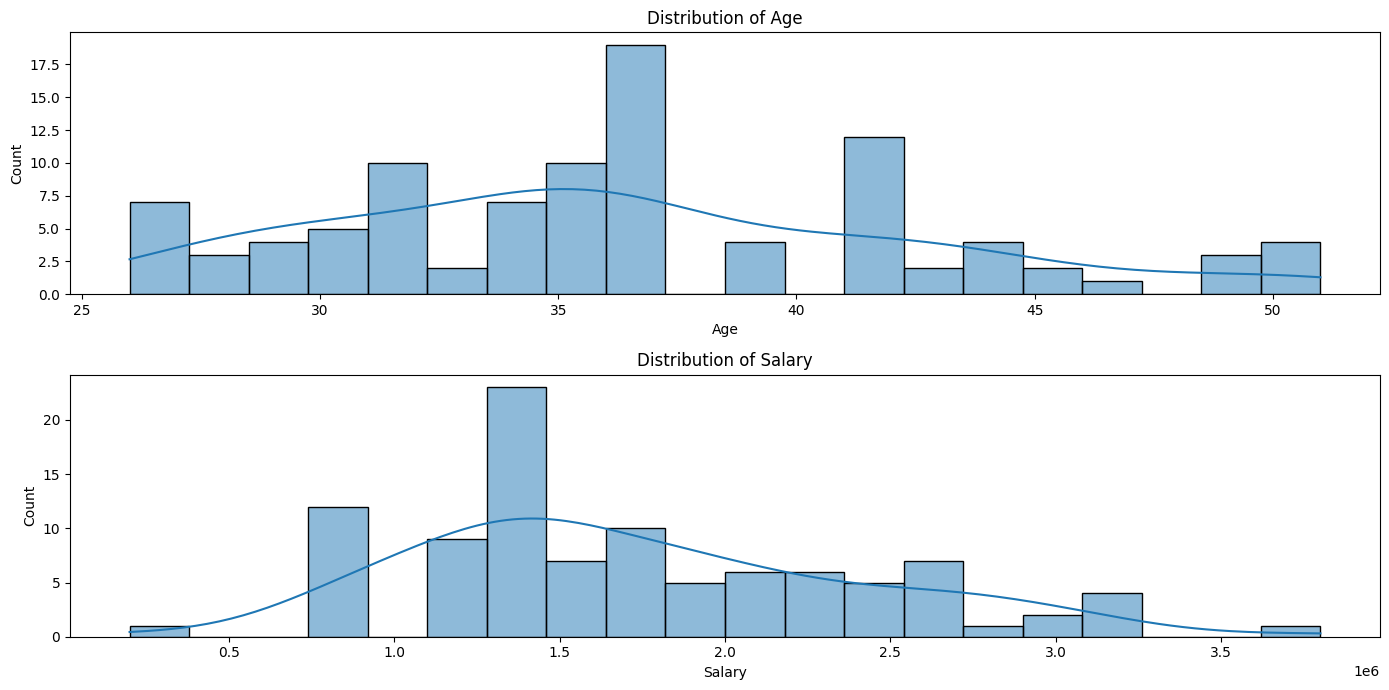

In [14]:
plt.figure(figsize=(14, 7))

# Distribution of Age
plt.subplot(2, 1, 1)
sns.histplot(de_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Salary
plt.subplot(2, 1, 2)
sns.histplot(de_data['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()



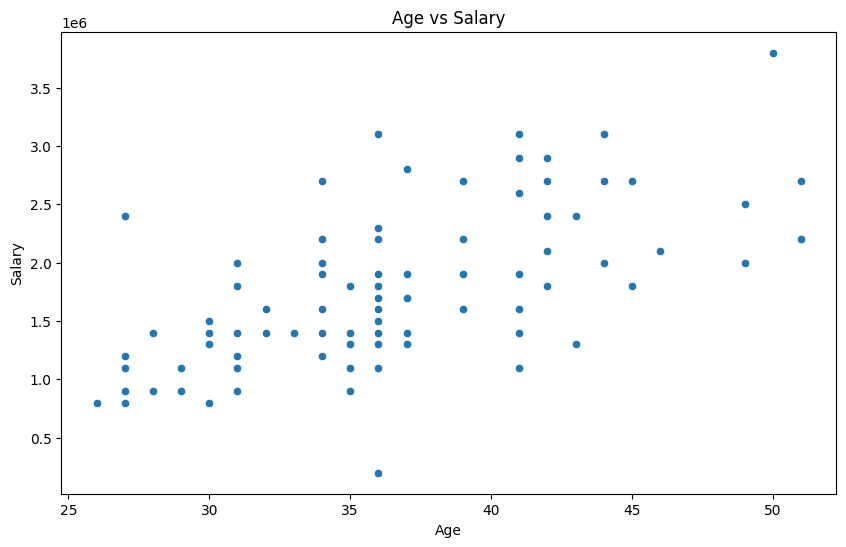

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=de_data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


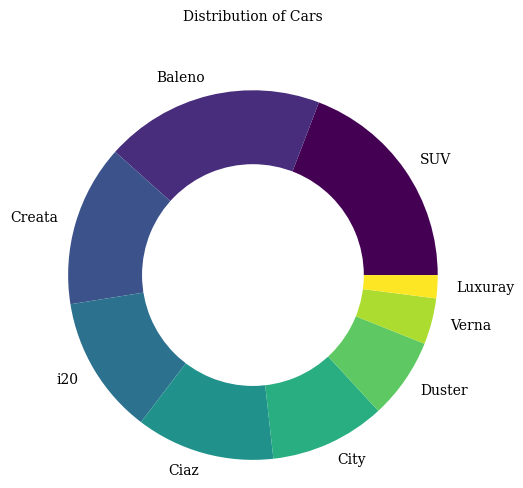

In [16]:

car_make_counts = de_data['Make'].value_counts()

plt.figure(figsize=(3, 3))  # Adjust the figure size as needed
car_make_counts.plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Distribution of Cars', family='serif', size=10, pad=100)
plt.ylabel('')
plt.show()

EV distributions


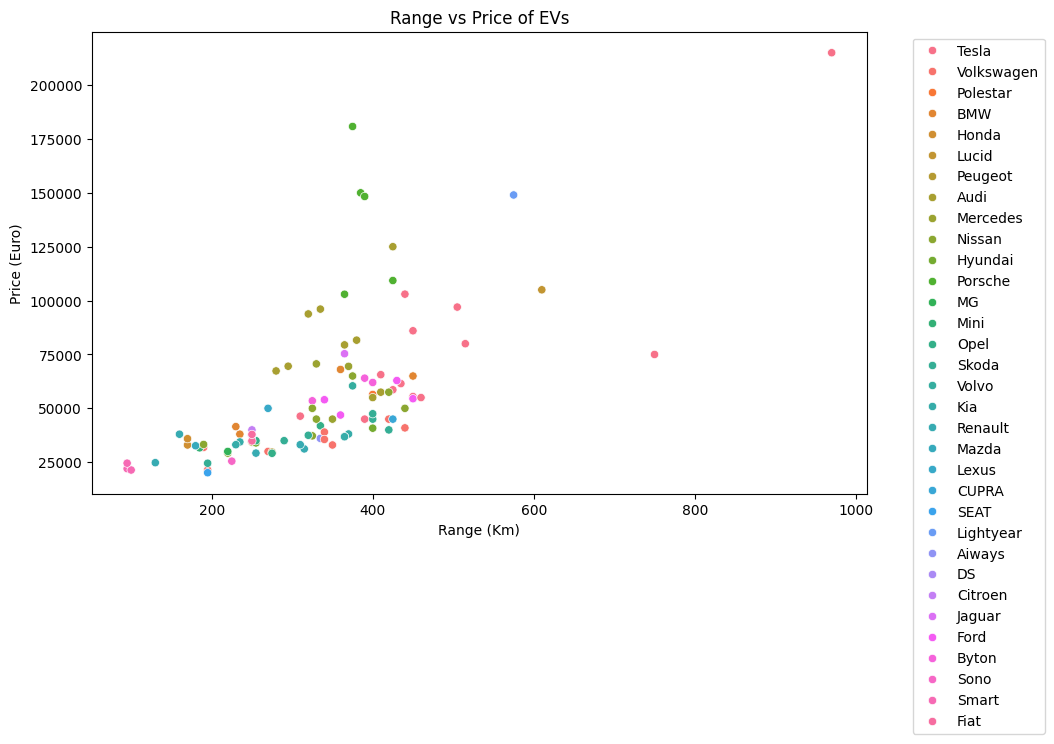

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range_Km', y='PriceEuro', hue='Brand', data=pe_data)
plt.title('Range vs Price of EVs')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()